# Preprocessing Data for Mushroom

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
# read mushroom data and add headers to the columns
mushroom = pd.read_csv('agaricus-lepiota.data',usecols=[0,5,6,7,8,9], header=None)
mushroom.columns = ['target', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']
mushroom.head()

,target,odor,gill-attachment,gill-spacing,gill-size,gill-color
0,p,p,f,c,n,k
1,e,a,f,c,b,k
2,e,l,f,c,b,n
3,p,p,f,c,n,n
4,e,n,f,w,b,k


The target for the mushroom dataset that we want to predict is if the mushroom is poisonous or edible.

First, we want to analyze the different features relate to the target.

1. Odor vs Target

In [3]:
# find out for each category of odor, how many are edible/poisonous
odor_target_count = mushroom.groupby(['odor', 'target']).size()
odor_target_percentage = odor_target_count/mushroom.groupby('odor').size() *100
odor_target_result = pd.DataFrame({'Count':odor_target_count, 'Percentage':odor_target_percentage})
odor_target_result

Count  Percentage
odor target                   
a    e         400  100.000000
c    p         192  100.000000
f    p        2160  100.000000
l    e         400  100.000000
m    p          36  100.000000
n    e        3408   96.598639
     p         120    3.401361
p    p         256  100.000000
s    p         576  100.000000
y    p         576  100.000000

<Axes: xlabel='count', ylabel='odor'>

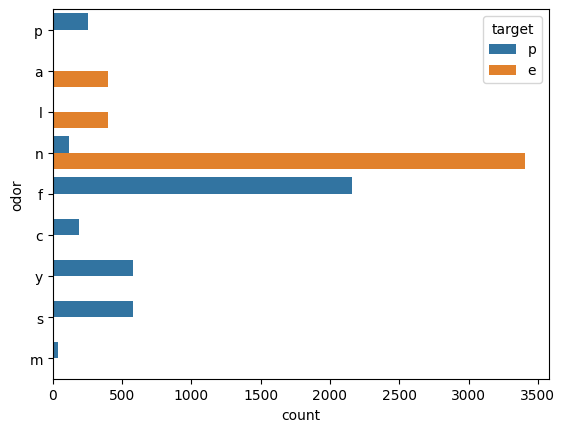

In [4]:
sns.countplot(data=mushroom, y='odor', hue='target')

From the previous plot and calculation, odor can be a feature that is useful in predicting if a mushroom is poisonous or edible. In the current dataset, mushrooms with odor that are pungent(p), foul(f), creosote(c), fishy(y), spicy(s), and musty(m) are 100% poisonous. Mushrooms with odor that are almond(a) and anise(l) are 100% edible. About 96.6% of the mushrooms with no smell(n) are edible.

2. 	Gill Attachment vs Target

In [5]:
# find out for each category of gill-attachment, how many are edible/poisonous
gill_attachment_target_count = mushroom.groupby(['gill-attachment', 'target']).size()
gill_attachment_target_percentage = gill_attachment_target_count/mushroom.groupby('gill-attachment').size() *100
gill_attachment_target_result = pd.DataFrame({'Count':gill_attachment_target_count, 'Percentage':gill_attachment_target_percentage})
gill_attachment_target_result

Count  Percentage
gill-attachment target                   
a               e         192   91.428571
                p          18    8.571429
f               e        4016   50.745514
                p        3898   49.254486

<Axes: xlabel='count', ylabel='gill-attachment'>

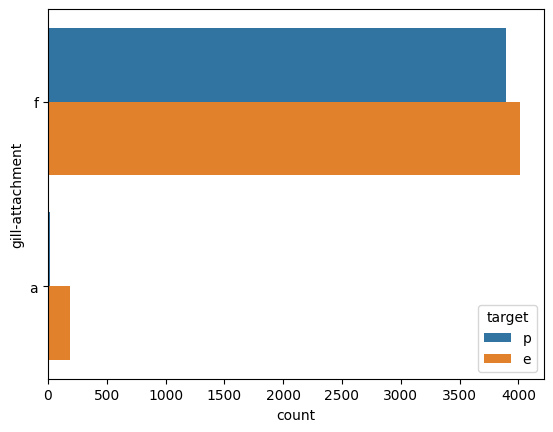

In [6]:
sns.countplot(data=mushroom, y='gill-attachment', hue='target')

From the plot and calculation for correlation between gill attachment and the target, 91.43% of mushrooms with attached(a) gills are edible and 8.57% are poisonous. 50.76% of mushrooms with free(a) gills are edible and 49.25% are poisonous. In the current dataset, most of the mushrooms with attached(a) gills are edible, but for mushrooms with free(f) gills it's almost half edible and half poisonous. We will have to further examine the correlation between the gill-attachment feature and target.

3. 	Gill Spacing vs Target

In [7]:
# find out for each category of gill-spacing, how many are edible/poisonous
gill_spacing_target_count = mushroom.groupby(['gill-spacing', 'target']).size()
gill_spacing_target_percentage = gill_spacing_target_count/mushroom.groupby('gill-spacing').size() *100
gill_spacing_target_result = pd.DataFrame({'Count':gill_spacing_target_count, 'Percentage':gill_spacing_target_percentage})
gill_spacing_target_result

Count  Percentage
gill-spacing target                   
c            e        3008   44.157369
             p        3804   55.842631
w            e        1200   91.463415
             p         112    8.536585

<Axes: xlabel='count', ylabel='gill-spacing'>

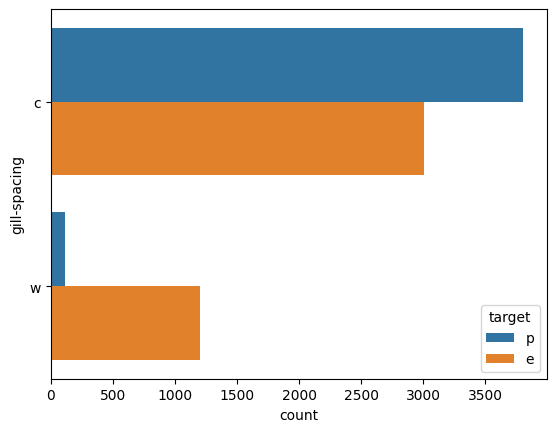

In [8]:
sns.countplot(data=mushroom, y='gill-spacing', hue='target')

Gill spacing is another feature we need to further examine before using it to predict if a mushroom is poisonous or edible. About 55.84% of mushrooms with close spacing is poisonous, and 44.16% are edible. About 91.46% of mushrooms with wide spacing is edible, and 8.54% are poisonous.

4. 	Gill Size vs Target

In [9]:
# find out for each category of gill-size, how many are edible/poisonous
gill_size_target_count = mushroom.groupby(['gill-size', 'target']).size()
gill_size_target_percentage = gill_size_target_count/mushroom.groupby('gill-size').size() *100
gill_size_target_result = pd.DataFrame({'Count':gill_size_target_count, 'Percentage':gill_size_target_percentage})
gill_size_target_result

Count  Percentage
gill-size target                   
b         e        3920   69.850321
          p        1692   30.149679
n         e         288   11.464968
          p        2224   88.535032

<Axes: xlabel='count', ylabel='gill-size'>

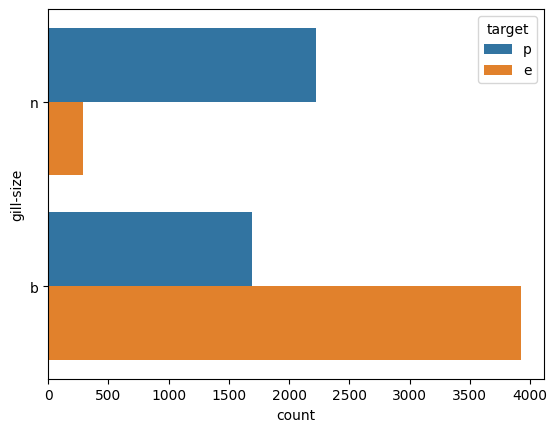

In [10]:
sns.countplot(data=mushroom, y='gill-size', hue='target')

Gill size is another feature we need to further examine before using it to predict if a mushroom is poisonous or edible, since neither broad gill size (70% edible, 30% poisonous) nor narrow size (11% edible, 89% poisonous) can be used to 100% determine if a mushroom is poisonous or not. 

5. 	Gill Color vs Target

In [11]:
# find out for each category of gill-color, how many are edible/poisonous
gill_color_target_count = mushroom.groupby(['gill-color', 'target']).size()
gill_color_target_percentage = gill_color_target_count/mushroom.groupby('gill-color').size() *100
gill_color_target_result = pd.DataFrame({'Count':gill_color_target_count, 'Percentage':gill_color_target_percentage})
gill_color_target_result

Count  Percentage
gill-color target                   
b          p        1728  100.000000
e          e          96  100.000000
g          e         248   32.978723
           p         504   67.021277
h          e         204   27.868852
           p         528   72.131148
k          e         344   84.313725
           p          64   15.686275
n          e         936   89.312977
           p         112   10.687023
o          e          64  100.000000
p          e         852   57.104558
           p         640   42.895442
r          p          24  100.000000
u          e         444   90.243902
           p          48    9.756098
w          e         956   79.534110
           p         246   20.465890
y          e          64   74.418605
           p          22   25.581395

<Axes: xlabel='count', ylabel='gill-color'>

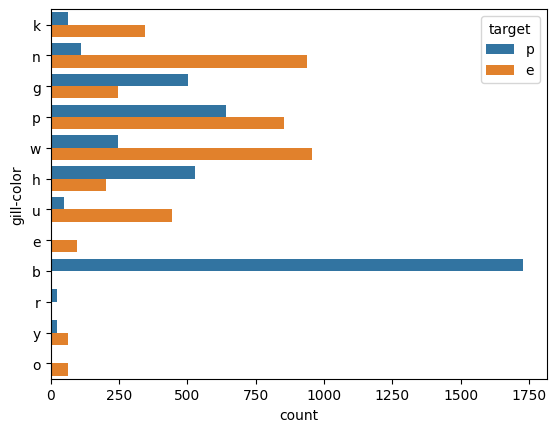

In [12]:
sns.countplot(data=mushroom, y='gill-color', hue='target')

Gill color can be a useful feature to predict if a mushroom is poisonous or edible. For this dataset, mushrooms with buff(b) or green(r) colors are 100% poisonous, mushrooms with red(e) or orange(o) colors are 100% edible. However, the number of datapoints for green mushrooms are only 24, we will need more dataset to check if green mushrooms are guareentee

## Convert values from strings to numbers

The current values are in letters, downstream processing using scikit-learn requires that values be stored as numerics. Next, we convert the strings to numbers using the mushroom_dictionary.

In [13]:
mushroom_dictionary = {
    'target': {'e': 0,'p': 1},
    'odor':{'a': 0,'l': 1,'c': 2,'y': 3,'f': 4,'m': 5,'n': 6,'p': 7,'s': 8},
    'gill-attachment':{'a': 0,'d': 1,'f': 2,'n': 3},
    'gill-spacing':{'c': 0, 'w': 1, 'd': 2},
    'gill-size':{'b': 0,'n': 1},
    'gill-color':{'k': 0,'n': 1,'b': 2,'h':3,'g': 4,'r': 5,'o': 6,'p': 7,'u': 8,'e': 9,'w': 10,'y': 11}
}

In [14]:
pd.set_option('future.no_silent_downcasting', True) 

mushroom.replace(mushroom_dictionary, inplace=True)
mushroom.head()

,target,odor,gill-attachment,gill-spacing,gill-size,gill-color
0,1,7,2,0,1,0
1,0,0,2,0,0,0
2,0,1,2,0,0,1
3,1,7,2,0,1,1
4,0,6,2,1,0,0


Now the dataset is ready for model training and testing.